In [1]:
import pandas as pd

In [2]:
df_test = pd.read_csv("GUIDE_Test.csv")

C:\Users\c186\AppData\Local\Temp\ipykernel_11904\1483317521.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("GUIDE_Test.csv")


In [3]:
df_test = pd.DataFrame(df_test)
df_test.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


# **Data** **Handling** 

In [4]:
df_test.shape

(4147992, 46)

In [5]:
df_test.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [6]:
# Romove 50% null value columns

threshold = len(df_test) * 0.5
df_test = df_test.dropna(thresh=threshold,axis=1)

In [7]:
df_test.shape

(4147992, 36)

In [8]:
df_test.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [9]:
df_test["Timestamp"] = pd.to_datetime(df_test["Timestamp"])

In [10]:
df_test["Day"] = df_test["Timestamp"].dt.day
df_test["Month"] = df_test["Timestamp"].dt.month
df_test["Year"] = df_test["Timestamp"].dt.year
df_test["Hour"] = df_test["Timestamp"].dt.hour
df_test["Time"] = df_test["Timestamp"].dt.time

In [11]:
# drop Timestamp column
df_test.drop("Timestamp",axis=1,inplace=True) 

# **Data** **Visualization**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df_test.IncidentGrade.value_counts()

IncidentGrade
BenignPositive    1752940
TruePositive      1492354
FalsePositive      902698
Name: count, dtype: int64

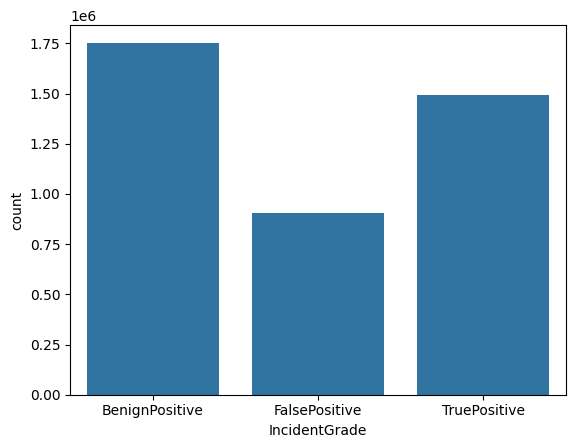

In [14]:
# Target Visual

sns.countplot(x="IncidentGrade",data=df_test)
plt.show()

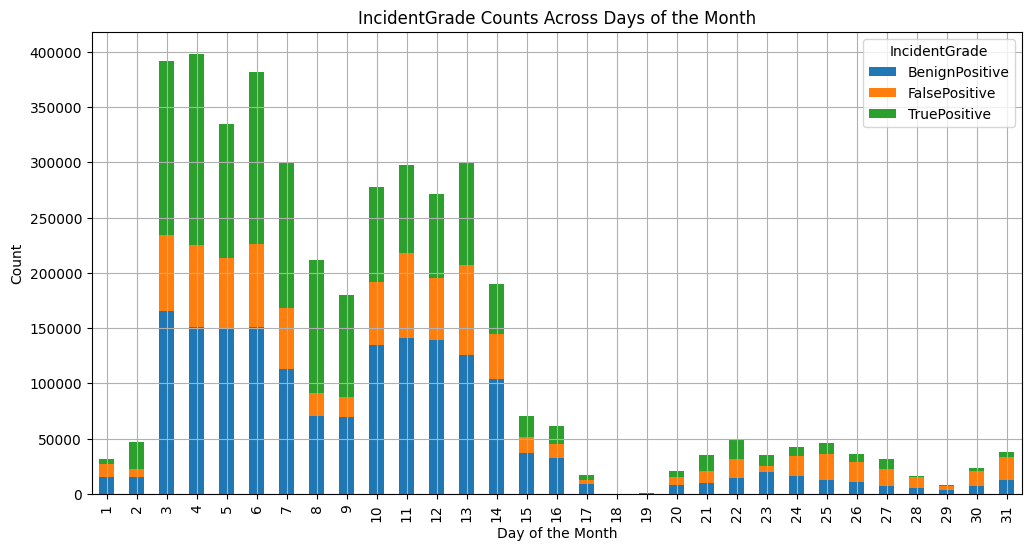

In [15]:
# aggregate data
day_incident = df_test.groupby(["Day","IncidentGrade"]).size().unstack()

#plot
day_incident.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

# **Feature** **Selection** **and** **Correlation**

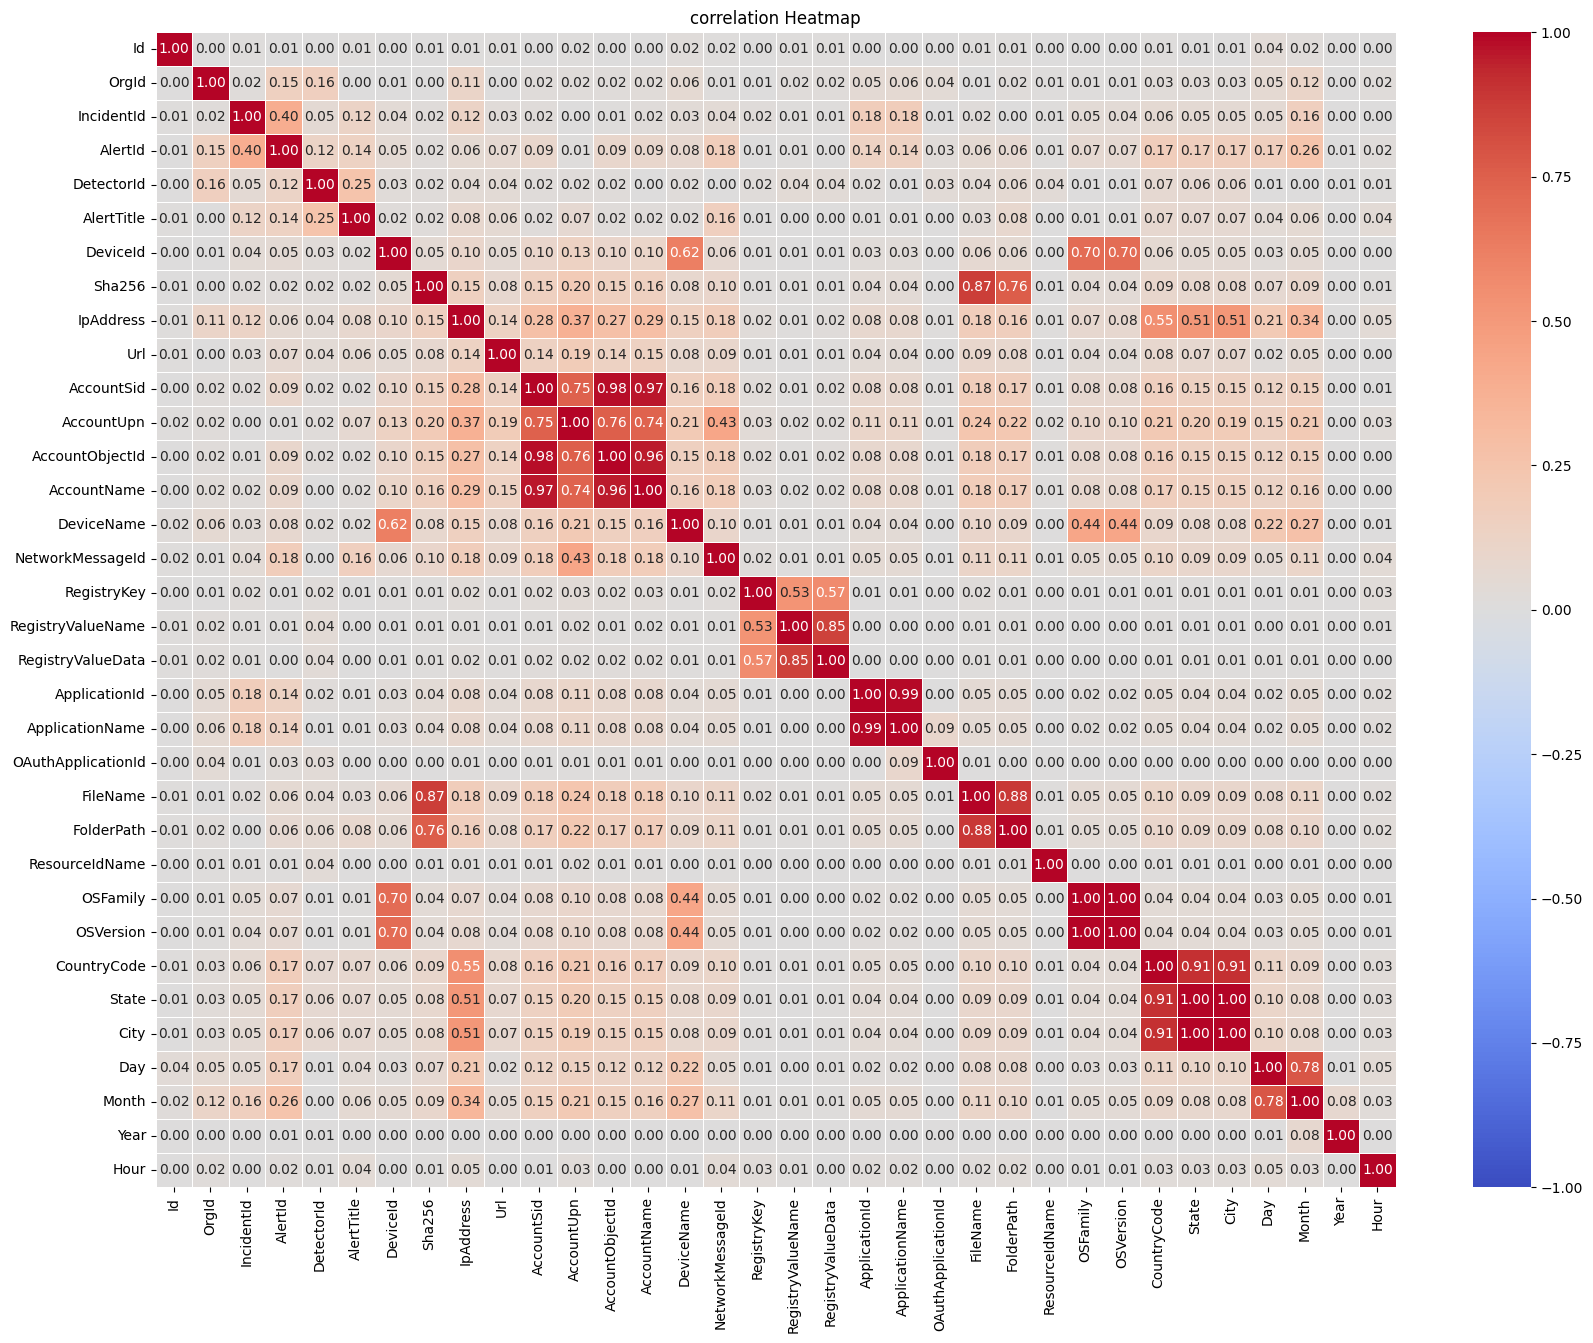

In [16]:
# selecting numerical col
numeric_df = df_test.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [17]:
import numpy as np

# Get the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation > 0.75
high_corr_pairs = [
    (column, index) 
    for column in upper_triangle.columns 
    for index in upper_triangle.index 
    if upper_triangle.loc[index, column] > 0.75
]

# Print highly correlated feature pairs
print("Highly correlated feature pairs (correlation > 0.75):")
for pair in high_corr_pairs:
    print(pair)


Highly correlated feature pairs (correlation > 0.75):
('AccountObjectId', 'AccountSid')
('AccountObjectId', 'AccountUpn')
('AccountName', 'AccountSid')
('AccountName', 'AccountObjectId')
('RegistryValueData', 'RegistryValueName')
('ApplicationName', 'ApplicationId')
('FileName', 'Sha256')
('FolderPath', 'Sha256')
('FolderPath', 'FileName')
('OSVersion', 'OSFamily')
('State', 'CountryCode')
('City', 'CountryCode')
('City', 'State')
('Month', 'Day')


In [18]:
df_test.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Usage', 'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [19]:
#drop 70% Correlate Columns 

df_test.drop(columns=['Id','AccountObjectId','AccountSid','AccountUpn','AccountName','RegistryValueData','RegistryValueName',
                        'ApplicationName', 'ApplicationId','RegistryKey','FileName','FolderPath','Sha256','OSVersion','OSFamily',
                        'State','DetectorId','DeviceId','DeviceName','CountryCode','NetworkMessageId','OAuthApplicationId','ResourceIdName','Year'],axis=1 ,inplace=True)


In [20]:
df_test.columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'City', 'Usage', 'Day', 'Month', 'Hour', 'Time'],
      dtype='object')

In [21]:
df_test

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,City,Usage,Day,Month,Hour,Time
0,657,11767,87199,563,LateralMovement,BenignPositive,User,Impacted,360606,160396,10630,Private,4,6,22,22:56:27
1,3,91158,632273,2,CommandAndControl,BenignPositive,Machine,Impacted,360606,160396,10630,Public,3,6,12,12:58:26
2,145,32247,131719,10807,LateralMovement,BenignPositive,Process,Related,360606,160396,10630,Public,8,6,3,03:20:49
3,222,15294,917686,0,InitialAccess,FalsePositive,CloudLogonSession,Related,360606,160396,10630,Public,12,6,12,12:07:31
4,363,7615,5944,18,Discovery,BenignPositive,User,Impacted,360606,160396,10630,Public,6,6,17,17:42:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,262,3017,227156,120,InitialAccess,BenignPositive,User,Impacted,360606,160396,10630,Public,4,6,3,03:53:15
4147988,1323,31001,304819,196,InitialAccess,BenignPositive,User,Impacted,360606,160396,10630,Private,4,6,19,19:32:19
4147989,47,3653,7243,29,CommandAndControl,FalsePositive,Ip,Related,1084,160396,10630,Public,15,6,0,00:50:22
4147990,70,4243,19142,1,InitialAccess,BenignPositive,Mailbox,Impacted,360606,160396,10630,Private,11,6,16,16:18:12


# **Encoding**

In [22]:
from sklearn.preprocessing import  LabelEncoder

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  City           int64 
 11  Usage          object
 12  Day            int32 
 13  Month          int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(7), object(6)
memory usage: 458.9+ MB


In [24]:
df_test.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time'],
      dtype='object')

In [25]:
catagory_col = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage', 'Time']
catagory_col

['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage', 'Time']

In [26]:
encoding = {}

for i in catagory_col:
    le = LabelEncoder()
    df_test[i] = le.fit_transform(df_test[i])
    encoding[i] = le
    

In [27]:
#df_test.to_csv("Final_TestDF",index=False) 

# **Model** **Building**

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 16 columns):
 #   Column         Dtype
---  ------         -----
 0   OrgId          int64
 1   IncidentId     int64
 2   AlertId        int64
 3   AlertTitle     int64
 4   Category       int32
 5   IncidentGrade  int32
 6   EntityType     int32
 7   EvidenceRole   int32
 8   IpAddress      int64
 9   Url            int64
 10  City           int64
 11  Usage          int32
 12  Day            int32
 13  Month          int32
 14  Hour           int32
 15  Time           int32
dtypes: int32(9), int64(7)
memory usage: 363.9 MB


In [28]:
# Drop rows where target is NaN
df_test = df_test.dropna(subset=['IncidentGrade'])

x = df_test.drop('IncidentGrade', axis=1)
y = df_test['IncidentGrade']

In [35]:
# Model 1

from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42 )

gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(x_train,y_train)

y_pred = gb_classifier.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average="weighted")
recall = recall_score(y_test,y_pred, average="weighted")
f1_score = f1_score(y_test,y_pred, average="weighted")

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1_Score : {f1_score:.2f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.81
Precision : 0.84
Recall : 0.81
F1_Score : 0.81

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.96      0.82    350403
           1       0.90      0.60      0.72    180282
           2       0.94      0.76      0.84    298914

    accuracy                           0.81    829599
   macro avg       0.85      0.77      0.79    829599
weighted avg       0.84      0.81      0.81    829599



In [37]:
# Model 2

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42 )

XGBClassifier = XGBClassifier(random_state=42)

XGBClassifier.fit(x_train,y_train)

y_pred = XGBClassifier.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average="weighted")
recall = recall_score(y_test,y_pred, average="weighted")
f1_score = f1_score(y_test,y_pred, average="weighted")

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1_Score : {f1_score:.2f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.92
Precision : 0.93
Recall : 0.92
F1_Score : 0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.96      0.93    350403
           1       0.94      0.86      0.90    180282
           2       0.96      0.92      0.94    298914

    accuracy                           0.92    829599
   macro avg       0.93      0.91      0.92    829599
weighted avg       0.93      0.92      0.92    829599



In [38]:
# Model 3

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42 )

RandomForest = RandomForestClassifier(random_state=42)

RandomForest.fit(x_train,y_train)

y_pred = RandomForest.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average="weighted")
recall = recall_score(y_test,y_pred, average="weighted")
f1_score = f1_score(y_test,y_pred, average="weighted")

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1_Score : {f1_score:.2f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))




Accuracy : 0.99
Precision : 0.99
Recall : 0.99
F1_Score : 0.99

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    350403
           1       0.98      0.98      0.98    180282
           2       0.99      0.99      0.99    298914

    accuracy                           0.99    829599
   macro avg       0.99      0.98      0.98    829599
weighted avg       0.99      0.99      0.99    829599

